In [1]:
import cv2
import glob
import scipy.io
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
import requests

In [11]:
# Scrape information from AKC website
page = requests.get('https://www.akc.org/dog-breeds/sporting/page/3')
soup = BeautifulSoup(page.content,'html.parser')
name_links = soup.select_one('select."custom-select__select"').select('option')[1:]
group_map = {}
for p in name_links:
    link = p.get('value')
    l_soup = BeautifulSoup(requests.get(link).content,'html.parser')
    group_map[p.text.lower()]=l_soup.select_one('li > span > a').text

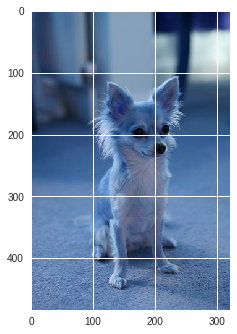

In [2]:
im=cv2.imread('Images/n02085620-Chihuahua/n02085620_10976.jpg')
plt.imshow(im)
plt.show()

In [3]:
def resize(im,desired_size=250):
    old_size = im.shape[:2] 
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    plt.imshow(new_im)
    plt.show()

In [4]:
def resize2(im,desired_size=250):
    old_size = im.shape[:2] 
    ratio = float(desired_size)/min(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im2 = cv2.resize(im, (new_size[1], new_size[0]))
    if im2.shape[0]>250:
        mid=int(im2.shape[0]/2)
        lt=mid-125
        rt=mid+125
        im3=im2[lt:rt,:,:]
    else:
        mid=int(im2.shape[1]/2)
        lt=mid-125
        rt=mid+125
        im3=im2[:,lt:rt,:]
    im4=cv2.resize(im3,(250,250))/255
    return im4

In [14]:
file_type=pd.read_csv('file',header=None,names=['filename','type'])

In [15]:
file_type['breed']=[i.split('/')[0].split('-')[1] for i in file_type.filename.values]
file_type.head()

,filename,type,breed
0,n02085620-Chihuahua/n02085620_10074.jpg,1,Chihuahua
1,n02085620-Chihuahua/n02085620_10131.jpg,1,Chihuahua
2,n02085620-Chihuahua/n02085620_10621.jpg,1,Chihuahua
3,n02085620-Chihuahua/n02085620_1073.jpg,1,Chihuahua
4,n02085620-Chihuahua/n02085620_10976.jpg,1,Chihuahua


In [76]:
# key is breed name and value is list containing the 10 images
breeds_10=list()
for i in range(1,121):
    print(i)
    breed=dict()
    breed['breed']=file_type['breed'].loc[file_type.type==i].values[0]
    breed['type_num']=i
    if breed['breed'].lower().replace('_',' ') not in group_map.keys():
        for b in group_map.keys():
            if breed['breed'].lower().replace('_',' ') in b:
                breed['breed_class']=group_map[b]
                break
    elif breed['breed'].lower().replace('_',' ')=='japanese spaniel':
        breed['breed_class']=group_map['cocker spaniel']
    elif breed['breed'].lower().replace('_',' ')=='maltese dog':
        breed['breed_class']=group_map['maltese']
    elif breed['breed'].lower().replace('_',' ')=='blenheim spaniel':
        breed['breed_class']=group_map['cocker spaniel']
    elif breed['breed'].lower().replace('_',' ')=='pekinese':
        breed['breed_class']=group_map['pekingese']
    elif breed['breed'].lower().replace('_',' ')=='shih':
        breed['breed_class']=group_map['shih tzu']
    elif breed['breed'].lower().replace('_',' ')=='toy terrier':
        breed['breed_class']=group_map['toy fox terrier']
    elif breed['breed'].lower().replace('_',' ')=='basset':
        breed['breed_class']=group_map['basset hound']
    elif breed['breed'].lower().replace('_',' ')=='bluetick':
        breed['breed_class']=group_map['bluetick coonhound']
    elif breed['breed'].lower().replace('_',' ')=='black':
        breed['breed_class']=group_map['black and tan coonhound']
    elif breed['breed'].lower().replace('_',' ')=='walker hound':
        breed['breed_class']=group_map['bluetick coonhound']
    elif breed['breed'].lower().replace('_',' ')=='redbone':
        breed['breed_class']=group_map['redbone coonhound']
    elif breed['breed'].lower().replace('_',' ')=='staffordshire bullterrier':
        breed['breed_class']=group_map['staffordshire bull terrier']
    elif breed['breed'].lower().replace('_',' ')=='boston bull':
        breed['breed_class']=group_map['boston terrier']
    elif breed['breed'].lower().replace('_',' ')=='flat':
        breed['breed_class']=group_map['flat-coated retriever']
    elif breed['breed'].lower().replace('_',' ')=='curly':
        breed['breed_class']=group_map['curly-coated retriever']
    elif breed['breed'].lower().replace('_',' ')=='german short':
        breed['breed_class']=group_map['german shorthaired pointer']
    elif 'terrier' in breed['breed'].lower().replace('_',' '):
        breed['breed_class']=group_map['staffordshire bull terrier']
    
    elif breed['breed'].lower().replace('_',' ')=="soft":
        breed['breed_class']=group_map['soft coated wheaten terrier']
    elif breed['breed'].lower().replace('_',' ')=="wire":
        breed['breed_class']=group_map['wire fox terrier']
    elif breed['breed'].lower().replace('_',' ')=="lhasa":
        breed['breed_class']=group_map['lhasa apso']
    else: 
        breed['breed_class']=group_map[breed['breed'].lower().replace('_',' ')]
    images=np.zeros([250,250,3,10])
    for index, row in file_type.loc[file_type.type==i].iterrows():
        if index>9: 
            break
        else: 
            images[:,:,:,index] = resize2(cv2.imread('Images/'+row['filename']))
    breed['images']=images
    breeds_10.append(breed)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


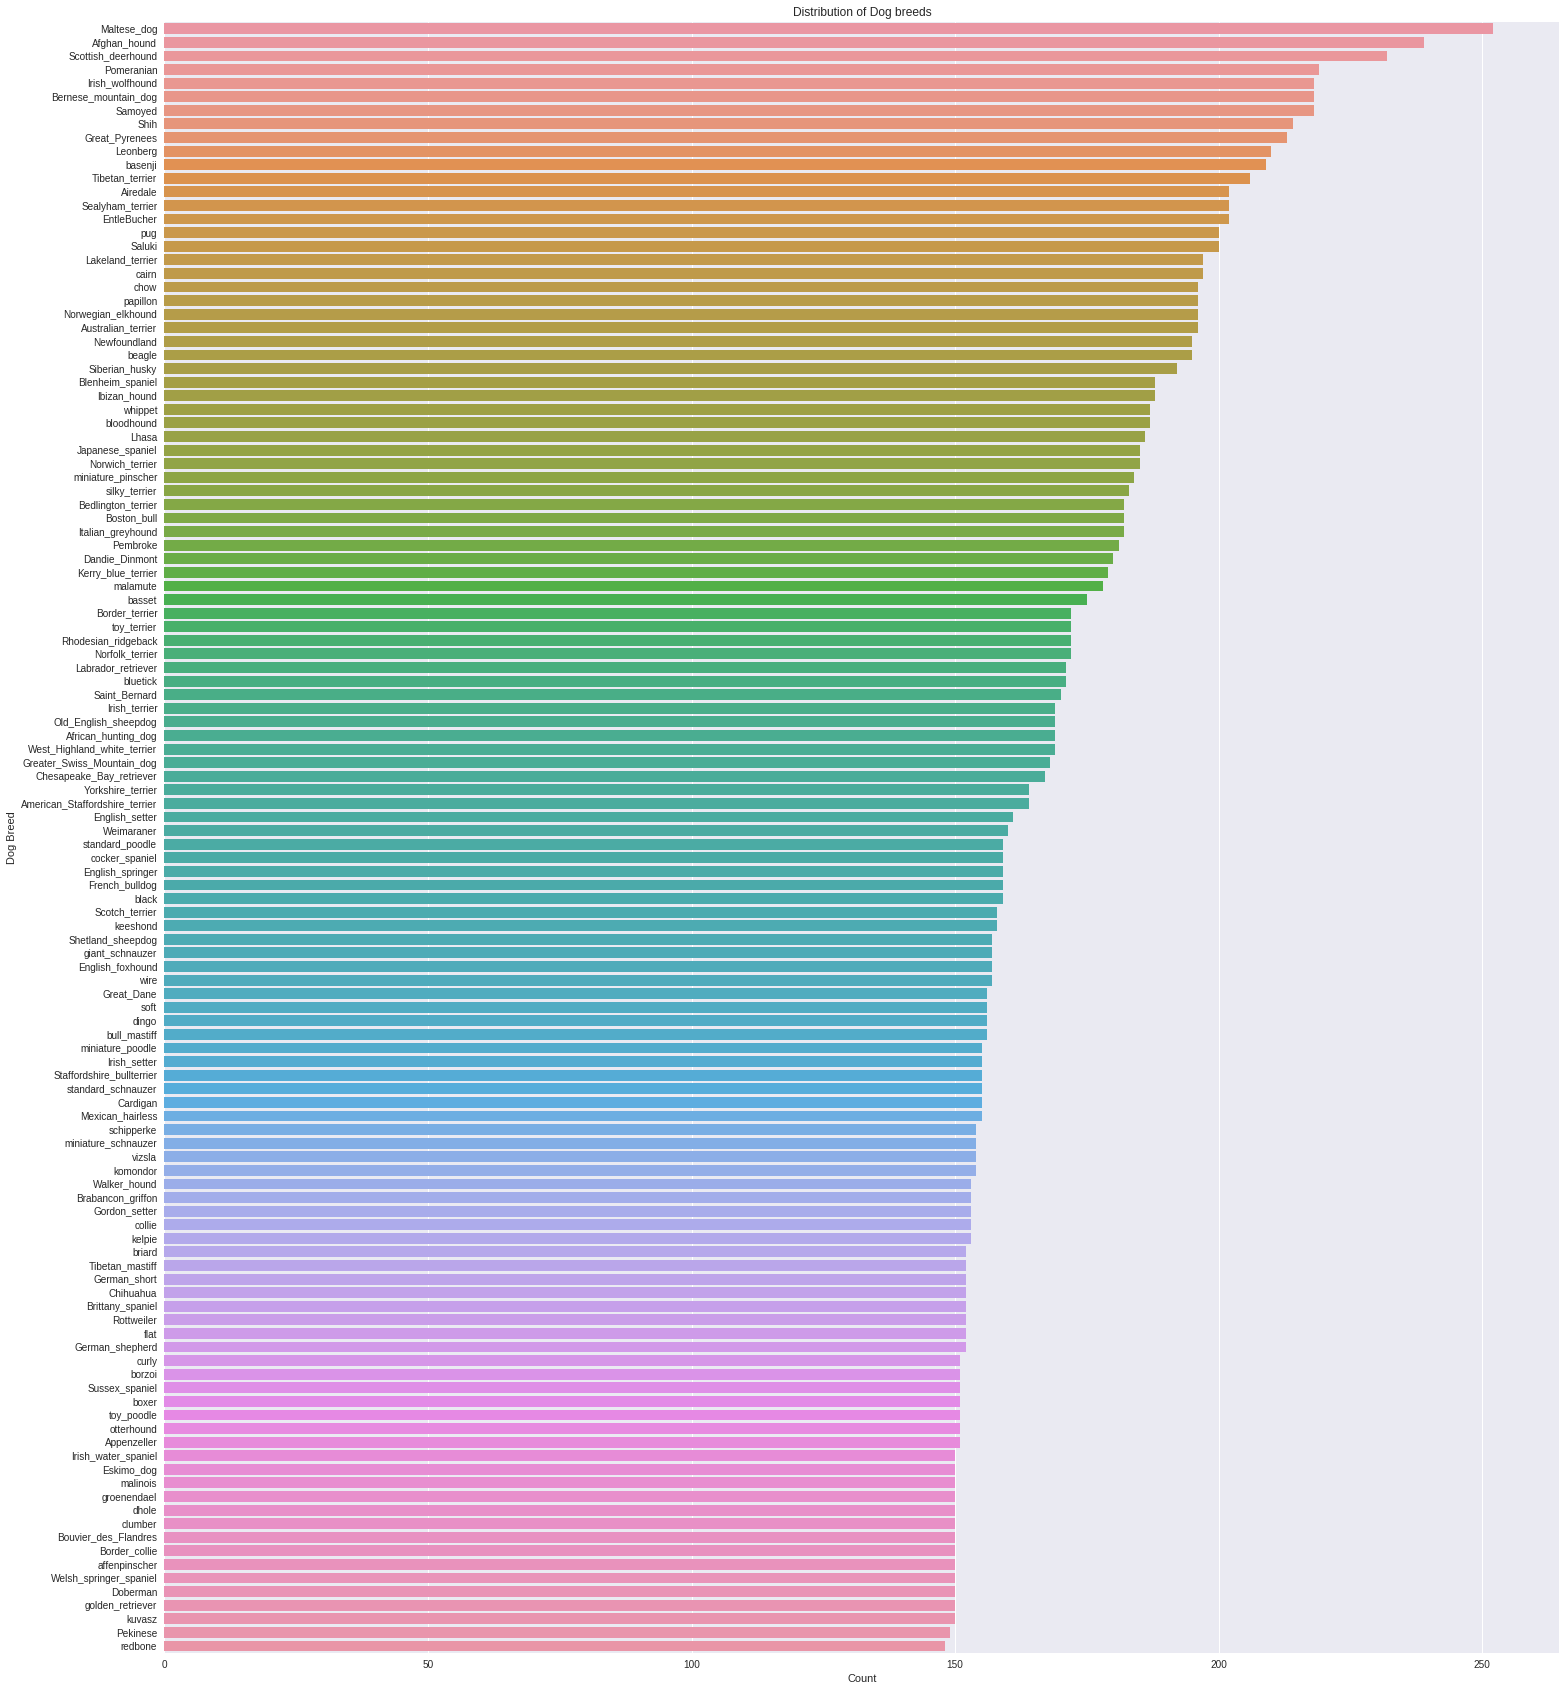

In [77]:
yy=file_type['breed'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(25, 30)
sns.set()
ax = sns.barplot(y = yy.index, x = yy, data = file_type,orient='h')
#ax.set_xticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 8)
ax.set(ylabel='Dog Breed', xlabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.savefig('distribution_breeds.png')

In [9]:
yy.head()

Maltese_dog           252
Afghan_hound          239
Scottish_deerhound    232
Pomeranian            219
Irish_wolfhound       218
Name: breed, dtype: int64

In [10]:
yy.tail()

Doberman            150
golden_retriever    150
kuvasz              150
Pekinese            149
redbone             148
Name: breed, dtype: int64

In [12]:
group_map

{'affenpinscher': 'Toy Group',
 'afghan hound': 'Hound Group',
 'airedale terrier': 'Terrier Group',
 'akita': 'Working Group',
 'alaskan malamute': 'Working Group',
 'american english coonhound': 'Hound Group',
 'american eskimo dog': 'Non-Sporting Group',
 'american foxhound': 'Hound Group',
 'american hairless terrier': 'Terrier Group',
 'american leopard hound': 'Foundation Stock Service',
 'american staffordshire terrier': 'Terrier Group',
 'american water spaniel': 'Sporting Group',
 'anatolian shepherd dog': 'Working Group',
 'appenzeller sennenhund': 'Foundation Stock Service',
 'australian cattle dog': 'Herding Group',
 'australian kelpie': 'Foundation Stock Service',
 'australian shepherd': 'Herding Group',
 'australian stumpy tail cattle dog': 'Foundation Stock Service',
 'australian terrier': 'Terrier Group',
 'azawakh': 'Miscellaneous Class',
 'barbet': 'Miscellaneous Class',
 'basenji': 'Hound Group',
 'basset fauve de bretagne': 'Foundation Stock Service',
 'basset hound

In [62]:
for i in group_map.keys():
    if 'hound' in i:
        
    

dict_keys(['affenpinscher', 'afghan hound', 'airedale terrier', 'akita', 'alaskan malamute', 'american english coonhound', 'american eskimo dog', 'american foxhound', 'american hairless terrier', 'american leopard hound', 'american staffordshire terrier', 'american water spaniel', 'anatolian shepherd dog', 'appenzeller sennenhund', 'australian cattle dog', 'australian kelpie', 'australian shepherd', 'australian stumpy tail cattle dog', 'australian terrier', 'azawakh', 'barbet', 'basenji', 'basset fauve de bretagne', 'basset hound', 'bavarian mountain scent hound', 'beagle', 'bearded collie', 'beauceron', 'bedlington terrier', 'belgian laekenois', 'belgian malinois', 'belgian sheepdog', 'belgian tervuren', 'bergamasco sheepdog', 'berger picard', 'bernese mountain dog', 'bichon frise', 'biewer terrier', 'black and tan coonhound', 'black russian terrier', 'bloodhound', 'bluetick coonhound', 'boerboel', 'bolognese', 'border collie', 'border terrier', 'borzoi', 'boston terrier', 'bouvier de

In [72]:
b

'airedale terrier'

In [74]:
if 'airedale' in b:
    print(b)

airedale terrier
